# Árboles de Decisión (Naive Bayes) (Python)
---

<img src='../Imagenes/arbol.png' style='width:20%;height:20%;float:left;margin-right:20px'>
Los árboles de decisión para la clasificación funcionan igual que los vistos para regresión.

La única diferencia es que el contenido de los nodos hojas son categorías en lugar de valores discretos

## Escenario del problema
---

<img src='../Imagenes/comprar.jpg' style='width:15%;height:15%;float:left;margin-right:20px'>
Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una re  
¡Vamos a ello!

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('Credit Scoring.csv',
                        encoding= 'unicode_escape', sep=";")
datos.head(10)

,age,job,marital,education,default,Unnamed: 5,Unnamed: 6
0,30,unemployed,married,primary,no,NaN,NaN
1,33,services,married,secondary,no,NaN,NaN
2,35,management,single,tertiary,no,NaN,NaN
3,30,management,married,tertiary,no,NaN,NaN
4,59,blue-collar,married,secondary,no,NaN,NaN
5,35,management,single,tertiary,no,NaN,NaN
6,36,self-employed,married,tertiary,no,NaN,NaN
7,39,technician,married,secondary,no,NaN,NaN
8,41,entrepreneur,married,tertiary,no,NaN,NaN
9,43,services,married,primary,no,NaN,NaN


In [3]:
import pandas as pd

for column in datos.columns:
    num_categories = datos[column].nunique()
    print(f"Number of categories in '{column}': {num_categories}")


Number of categories in 'age': 46
Number of categories in 'job': 12
Number of categories in 'marital': 3
Number of categories in 'education': 4
Number of categories in 'default': 2
Number of categories in 'Unnamed: 5': 1
Number of categories in 'Unnamed: 6': 1


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Seleccionar las columnas relevantes para encoding
columnas_categoricas = ['job', 'marital', 'education']

# Extraer la columna numérica 'age'
X_numerico = datos[['age']]

# Extraer las columnas categóricas
X_categorico = datos[columnas_categoricas]

# Utilizar OrdinalEncoder para la codificación categórica
encoder = OrdinalEncoder()
X_categorico_codificado = pd.DataFrame(encoder.fit_transform(X_categorico), columns=columnas_categoricas)

# Concatenar las columnas numéricas y categóricas codificadas
X = pd.concat([X_numerico, X_categorico_codificado], axis=1)

# Codificar la variable 'default' como categórica
encoder_default = OrdinalEncoder()
y = encoder_default.fit_transform(datos[['default']])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

weights = {0:1, 1:100}
# Ajustar el modelo de árbol de decisión con ajuste de hiperparámetros
tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=5, class_weight=weights)
tree_classifier.fit(X_train, y_train)
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train,y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)
y_pred_RF = random_forest.predict(X_test)
# Evaluar el modelo
accuracy_DT = accuracy_score(y_test, y_pred)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Exactitud DT :", accuracy_DT)
print("Exactitud RF :", accuracy_RF)
print(len(y))

Exactitud DT : 0.263395375070502
Exactitud RF : 0.9379582628313593
4432


/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Métricas arbol de decision

Exactitud (Accuracy): 0.263395375070502
Precisión (Precision): 0.2564396107613051
Sensibilidad (Recall): 0.9846153846153847
Especificidad: 0.014415781487101669
Puntuación F1: 0.40690281562216163


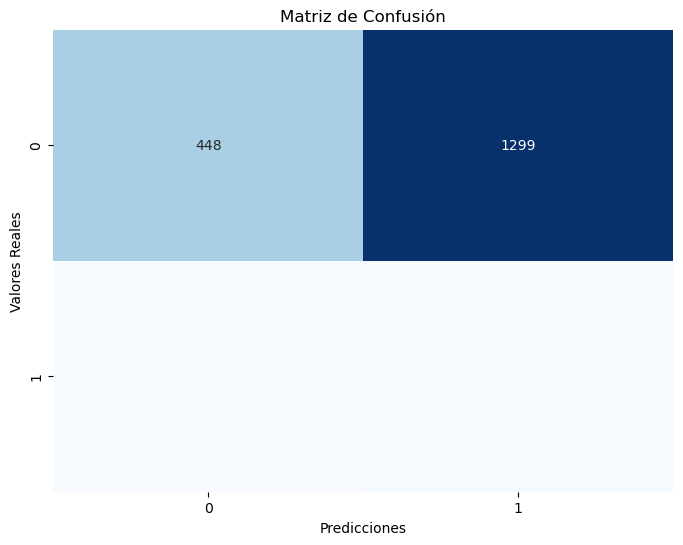

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.26      0.41      1747
         1.0       0.01      0.73      0.03        26

    accuracy                           0.26      1773
   macro avg       0.50      0.49      0.22      1773
weighted avg       0.97      0.26      0.40      1773



In [15]:
# 4. Evaluar el modelo de árbol de decisión usando una matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred)

# 5. Calcular métricas a partir de la matriz de confusión
TP_tree = cm_tree[0, 0]
TN_tree = cm_tree[1, 1]
FP_tree = cm_tree[0, 1]
FN_tree = cm_tree[1, 0]

accuracy_tree = (TP_tree + TN_tree) / (TP_tree + TN_tree + FP_tree + FN_tree)
precision_tree = TP_tree / (TP_tree + FP_tree)
recall_tree = TP_tree / (TP_tree + FN_tree)
specificity_tree = TN_tree / (TN_tree + FP_tree)
f1_score_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree)

# Imprimir las métricas calculadas
print("Exactitud (Accuracy):", accuracy_tree)
print("Precisión (Precision):", precision_tree)
print("Sensibilidad (Recall):", recall_tree)
print("Especificidad:", specificity_tree)
print("Puntuación F1:", f1_score_tree)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))



# Métricas Random Forest

Exactitud RF: 0.9379582628313593
Precisión RF: 0.951345163136806
Sensibilidad RF: 0.9851807943094251
Especificidad RF: 0.011627906976744186
Puntuación F1 RF: 0.9679673849737914


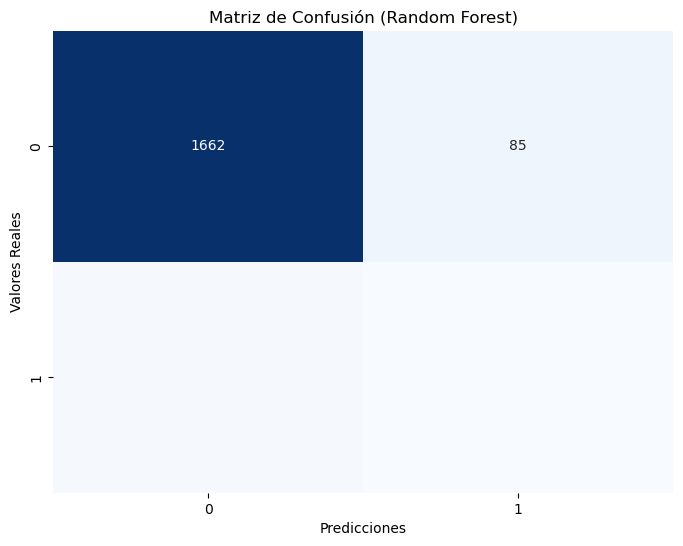

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1747
         1.0       0.01      0.04      0.02        26

    accuracy                           0.94      1773
   macro avg       0.50      0.49      0.49      1773
weighted avg       0.97      0.94      0.95      1773



In [16]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
TP_RF = cm_RF[0, 0]
TN_RF = cm_RF[1, 1]
FP_RF = cm_RF[0, 1]
FN_RF = cm_RF[1, 0]
precision_RF = TP_RF / (TP_RF + FP_RF)
recall_RF = TP_RF / (TP_RF + FN_RF)
specificity_RF = TN_RF / (TN_RF + FP_RF)
f1_score_RF = 2 * (precision_RF * recall_RF) / (precision_RF + recall_RF)

# Imprimir las métricas para el clasificador de bosque aleatorio
print("Exactitud RF:", accuracy_RF)
print("Precisión RF:", precision_RF)
print("Sensibilidad RF:", recall_RF)
print("Especificidad RF:", specificity_RF)
print("Puntuación F1 RF:", f1_score_RF)

# Visualizar la matriz de confusión para el clasificador de bosque aleatorio
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión (Random Forest)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Imprimir el reporte de clasificación para el clasificador de bosque aleatorio
print("Reporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_RF))

Exactitud (Accuracy): 0.263395375070502
Precisión (Precision): 0.2564396107613051
Sensibilidad (Recall): 0.9846153846153847
Especificidad: 0.014415781487101669
Puntuación F1: 0.40690281562216163


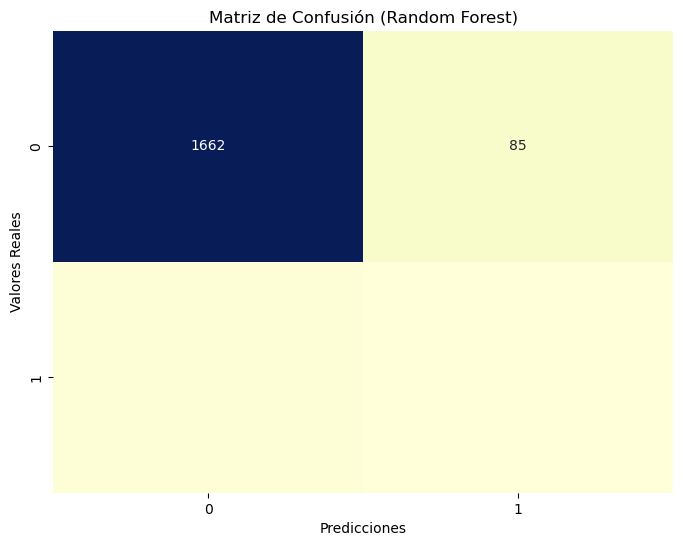

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 4. Evaluar el modelo de árbol de decisión usando una matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred)

# 5. Calcular métricas a partir de la matriz de confusión
TP_tree = cm_tree[0, 0]
TN_tree = cm_tree[1, 1]
FP_tree = cm_tree[0, 1]
FN_tree = cm_tree[1, 0]

accuracy_tree = (TP_tree + TN_tree) / (TP_tree + TN_tree + FP_tree + FN_tree)
precision_tree = TP_tree / (TP_tree + FP_tree)
recall_tree = TP_tree / (TP_tree + FN_tree)
specificity_tree = TN_tree / (TN_tree + FP_tree)
f1_score_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree)

# Imprimir las métricas calculadas
print("Exactitud (Accuracy):", accuracy_tree)
print("Precisión (Precision):", precision_tree)
print("Sensibilidad (Recall):", recall_tree)
print("Especificidad:", specificity_tree)
print("Puntuación F1:", f1_score_tree)

# Visualizar la matriz de confusión para el clasificador de bosque aleatorio con colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="YlGnBu", cbar=False)  # Cambia "YlGnBu" a la paleta de colores que desees
plt.title("Matriz de Confusión (Random Forest)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()



In [19]:
# Calcular el número de valores 1 en y_test
num_ones_y_test = np.sum(y_test == 1)

# Imprimir el número de valores 1 en y_test
print("Número de valores 1 en y_test:", num_ones_y_test)



Número de valores 1 en y_test: 26


In [ ]:
# 4. Separar en Entranamiento y Validación
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.25, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (300, 2)
La forma de y_train es:  (300,)
La forma de X_test es:  (100, 2)
La forma de y_test es:  (100,)


In [ ]:
# 5. Escalar los datos
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926]])

In [ ]:
# 6. Ajustar el Modelo
from sklearn.tree import DecisionTreeClassifier as Arbol
'''
criterion: criterio por el cual se realizan los divisiones en los nodos de las ramas
'''
clasificador = Arbol(criterion = 'entropy', random_state = 0)
clasificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# 7. Hacer las predicciones
#y_fit = clasificador.predict(X_train)
y_pred = clasificador.predict(X_test)

In [ ]:
# 8. Crear la Matriz de Confusión para evaluar la clasificación realizada
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

C:\Users\sinensia\AppData\Local\Temp\ipykernel_15588\2066389694.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


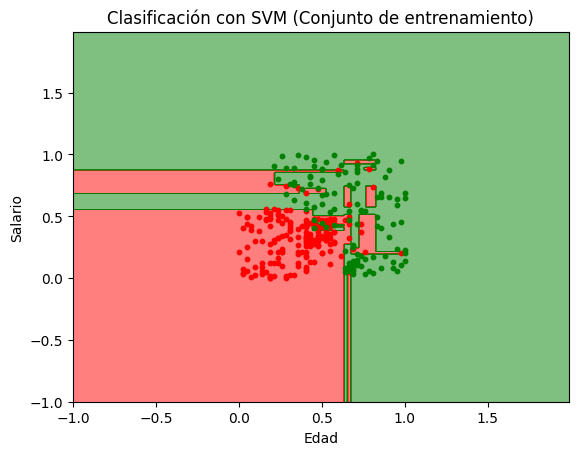

C:\Users\sinensia\AppData\Local\Temp\ipykernel_15588\2066389694.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


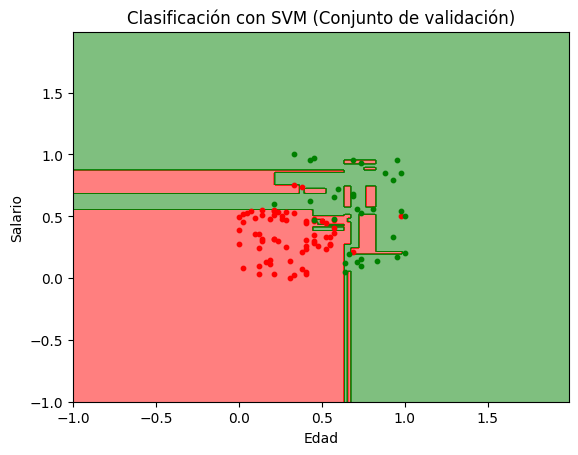

In [ ]:
# 9. Visualizar los resultados
# 9.1 Conjunto de entramiento
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# 9.2 Conjunto de validación
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# Conclusión
---
Hemos visto como el árbol de decisión ha ido realizando divisiones desde el nodo raíz generenado ramas para los diferentes valores que pueden tomar las variables independientes (edad y salario).

Las salidas posibles de los nodos hoja son 0 o 1, es decir si comprará el coche o no, rojo o verde.